

> Indented block



```
# This is formatted as code
```

# **Project Name**


<h1><b>Ted Talk View Prediction</b></h1>

# **Problem Statement**

<h2><b>Problem Statement</b></h2>

<h3>TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.<h3>

# **Project Work flow**

**bold text**<h1><b>Project Work flow</b></h1>

Importing Libraries

Loading the Dataset

EDA on features

Feature Engineering

Data Cleaning

Feature selection

Fitting the regression models and HyperParameter Tuning

Comparison of Models



Conclusion

<h1><b>Data Defination<b><h1>

<b>*Attribute </b>: Description (Data Type)*

*<b>talk_id Talk</b>* : identification number provided by TED (int)

*<b>title</b>* : Title of the talk (string)

*<b>speaker_1</b>* : First speaker in TED's speaker list (string)

*<b>speakers</b>* : Speakers in the talk (dictionary)

*<b>occupations</b>* : Occupations of the speakers (dictionary)

*<b>about_speakers</b>* : Blurb about each speaker (dictionary)

*<b>views(Dependent Variable)</b>* : Count of views / (int)

*<b>recorded_date</b>* : Date the talk was recorded (string)

*<b>published_date</b>* : Date the talk was published to TED.com (string)

*<b>event</b>* : Event or medium in which the talk was given (string)

*<b>native_lang</b>* Language the talk was given in (string)

*<b>available_lang</b>* : All available languages (lang_code) for a talk (list)

*<b>comments</b>* : Count of comments (int)

*<b>duration</b>* : Duration in seconds (int)

*<b>topics</b>* : Related tags or topics for the talk (list)

*<b>related_talks</b>* : Related talks (key='talk_id', value='title') (dictionary)

<b>url</b>* : URL of the talk (string)

*<b>description</b>* : Description of the talk (string)

*<b>transcript</b>* : Full transcript of the talk (string)

# **GitHub Link -**

**NAME**: Mohit Sonwane

**GITHUB** : https://github.com/mohitsonwane786/TEDxTALK_VIEW_PREDICTION


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Let's Begin !***

In [410]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import calendar


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [411]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:

# Loading dataset and creating dataframe
df = pd.read_csv('/content/drive/MyDrive/1st ML Regression Project/data_ted_talks (1).csv')

<h1>Get familiar with dataset</h1>

In [413]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [414]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [415]:
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

Lets check if the database consist the duplicates

In [416]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [talk_id, title, speaker_1, all_speakers, occupations, about_speakers, views, recorded_date, published_date, event, native_lang, available_lang, comments, duration, topics, related_talks, url, description, transcript]
Index: []



there is no duplicated rows in the dataset

the above summary shows the number of observations that have the same respose and same features

Lets check the presence of null values in databes

In [417]:
print(df.isnull().sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


dropping the null values

In [418]:

df = df.dropna()    # Dropping the missing values.
df.count()

talk_id           3338
title             3338
speaker_1         3338
all_speakers      3338
occupations       3338
about_speakers    3338
views             3338
recorded_date     3338
published_date    3338
event             3338
native_lang       3338
available_lang    3338
comments          3338
duration          3338
topics            3338
related_talks     3338
url               3338
description       3338
transcript        3338
dtype: int64

In [419]:
print(df.isnull().sum())

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


so now database has zero null values


<h1><b>Let's Start Feature Engineering<b><h1>

In [420]:

numerical_features   = ['duration',]
temporal_features    = ['recorded_date' , 'published_date']
categorical_features = ['event']

In [421]:
meta_features        = ['topics']
text_corpus_features = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ,]

irrelevant_features  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
unavailable_features = ['available_lang' , 'comments' , 'related_talks']

target = ['views']


all_features = numerical_features + temporal_features + categorical_features + meta_features + text_corpus_features + irrelevant_features + unavailable_features + target

list(zip(sorted(all_features) , sorted(list(df.columns.values))))
sorted(all_features) == sorted(list(df.columns.values))


False

In [422]:
N = len(df.columns)

In [423]:
# Value count of native_lang column

df.native_lang.value_counts()

en       3306
es         15
fr          7
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
ja          1
it          1
Name: native_lang, dtype: int64

In [424]:
for i in range(N):
    print(df.columns[i])

talk_id
title
speaker_1
all_speakers
occupations
about_speakers
views
recorded_date
published_date
event
native_lang
available_lang
comments
duration
topics
related_talks
url
description
transcript


getting columns having numerical data type

In [425]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [426]:
print(newdf)

      talk_id     views  comments  duration
0           1   3523392     272.0       977
1          92  14501685     628.0      1190
2           7   1920832     124.0      1286
3          53   2664069     219.0      1116
4          66  65051954    4931.0      1164
...       ...       ...       ...       ...
3994    62628    772022      31.0       954
3995    62627    672908      12.0       646
3999    62748    760969      37.0       941
4000    62678    502934       6.0       690
4002    62263    464414       9.0       774

[3338 rows x 4 columns]


In [427]:
df['recorded_date']  = pd.to_datetime(df['recorded_date']  ,format='%Y-%m-%d')
df['published_date'] = pd.to_datetime(df['published_date'] ,format='%Y-%m-%d')

df['days_taken_to_publish'] = df['published_date'] - df['recorded_date']

In [428]:
last_publishing_date = df['published_date'].max()

df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df['published_date'])

In [429]:

df['daily_views'] = df['views'] / ( df['time_since_published'].apply(lambda x : x.days) + 1 )

In [430]:
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day']  = pd.DatetimeIndex(df['published_date']).day

In [431]:
df.reset_index(inplace = True,drop = True)

In [432]:
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
df['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)

In [433]:
import ast
df['occupations']    = df['occupations']    .apply(ast.literal_eval)
df['topics']         = df['topics']         .apply(ast.literal_eval)
df['about_speakers'] = df['about_speakers'] .apply(ast.literal_eval)


In [434]:
df['occupations'] = df['occupations'].apply(lambda x : ' '.join([str(item) for sublist in list(x.values()) for item in sublist] ))

<h1><b>lets categories the events</b></h1>

In [435]:
# to all entries that don't fit into the chosen categories
df['event_category'] = 'Other'

for i in range(len(df)):
    if df['event'][i][0:5]=='TED20':
        df['event_category'][i] = 'TED2000s'
    elif df['event'][i][0:5]=='TED19':
        df['event_category'][i] = 'TED1900s'
    elif df['event'][i][0:4]=='TEDx':
        df['event_category'][i] = "TEDx"
    elif df['event'][i][0:7]=='TED@BCG':
        df['event_category'][i] = 'TED@BCG'
    elif df['event'][i][0:4]=='TED@':
        df['event_category'][i] = "TED@"
    elif df['event'][i][0:8]=='TEDSalon':
        df['event_category'][i] = "TEDSalon"
    elif df['event'][i][0:9]=='TEDGlobal':
        df['event_category'][i] = 'TEDGlobal'
    elif df['event'][i][0:8]=='TEDWomen':
        df['event_category'][i] = 'TEDWomen'
    elif df['event'][i][0:6]=='TEDMED':
        df['event_category'][i] = 'TEDMED'
    elif df['event'][i][0:3]=='TED':
        df['event_category'][i] = 'TEDOther'

In [436]:
 df['event_category'].unique()

array(['TED2000s', 'TEDGlobal', 'TEDSalon', 'Other', 'TED1900s',
       'TEDOther', 'TEDx', 'TED@', 'TEDMED', 'TEDWomen', 'TED@BCG'],
      dtype=object)

In [437]:
# Eval function applying on available_lang column

df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [438]:
# Creating a new feature num_of_lang

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [439]:
# Creating a new feature num_of_tags

df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

In [440]:
df['num_of_topics'] = df.apply(lambda x: len(x['topics']), axis=1)

In [441]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)

len(unique_topics)

449

In [442]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [443]:
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]

  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

<Axes: xlabel='num_of_lang', ylabel='Density'>

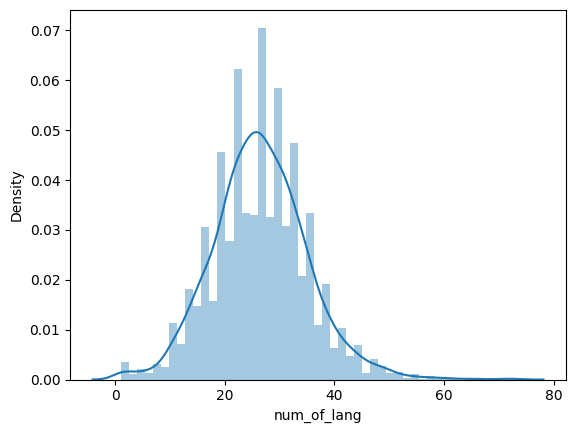

In [444]:
sns.distplot(df['num_of_lang'])

<Axes: xlabel='num_of_lang', ylabel='Density'>

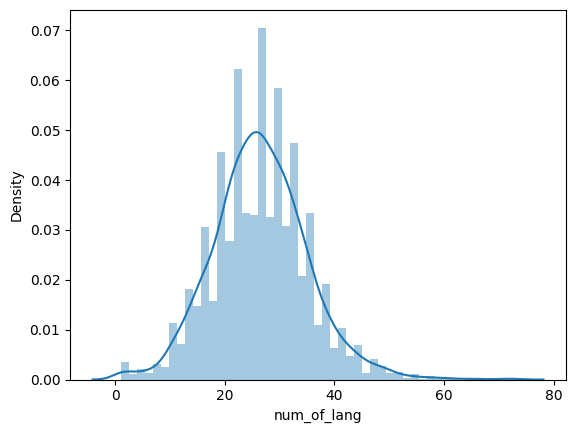

In [445]:
# Distplot to show distribution of num_of_lang column

sns.distplot(df['num_of_lang'])

<Axes: xlabel='talk_id', ylabel='Density'>

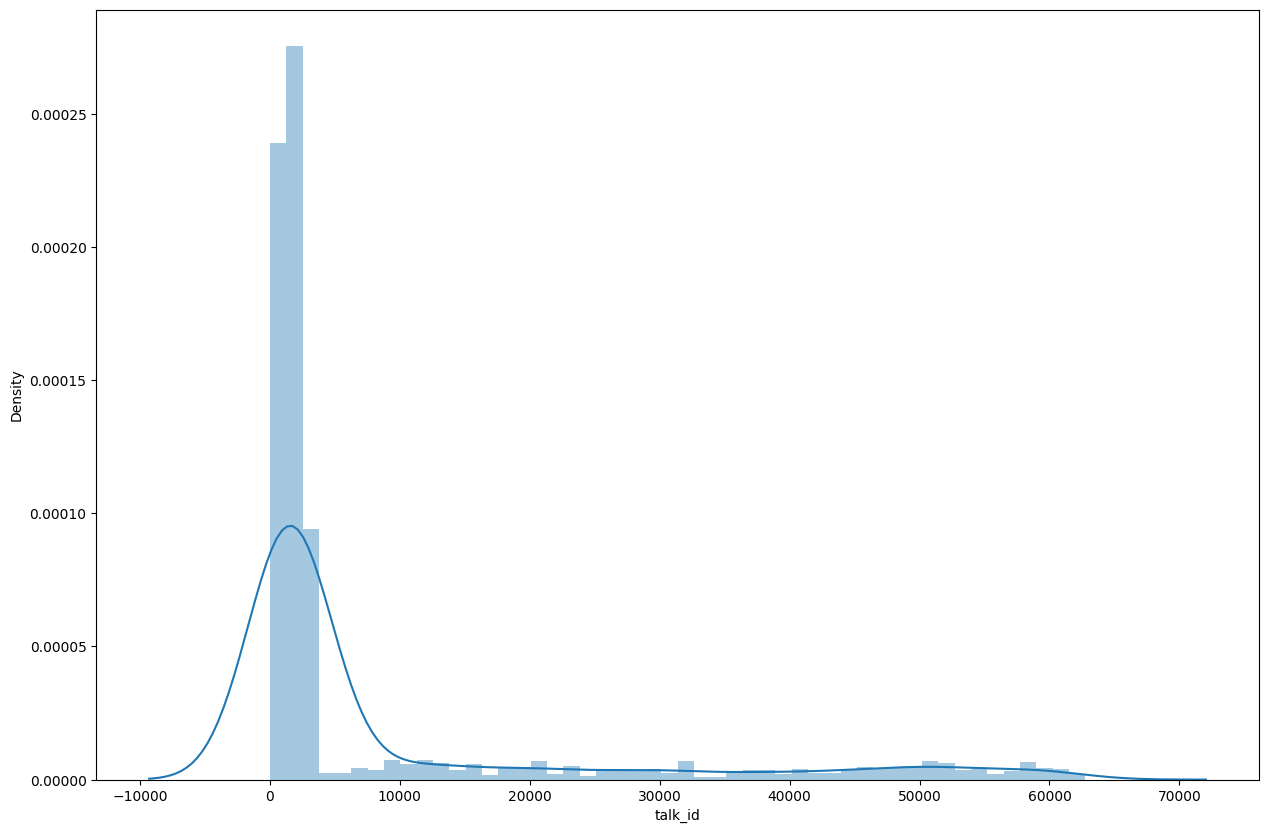

In [446]:
plt.figure(figsize=(15,10))
sns.distplot(newdf['talk_id'])

<Axes: xlabel='views', ylabel='Density'>

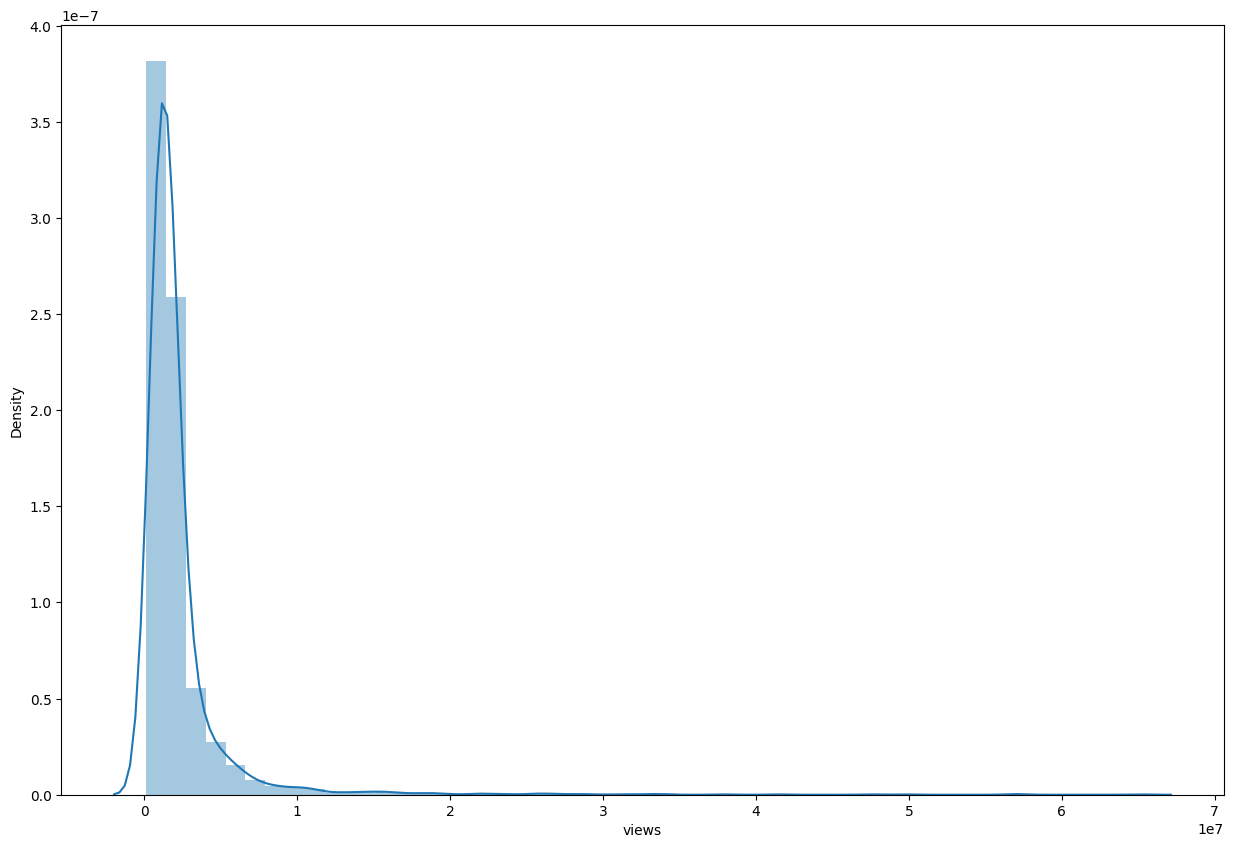

In [447]:
plt.figure(figsize=(15,10))
sns.distplot(newdf['views'])

<Axes: xlabel='comments', ylabel='Density'>

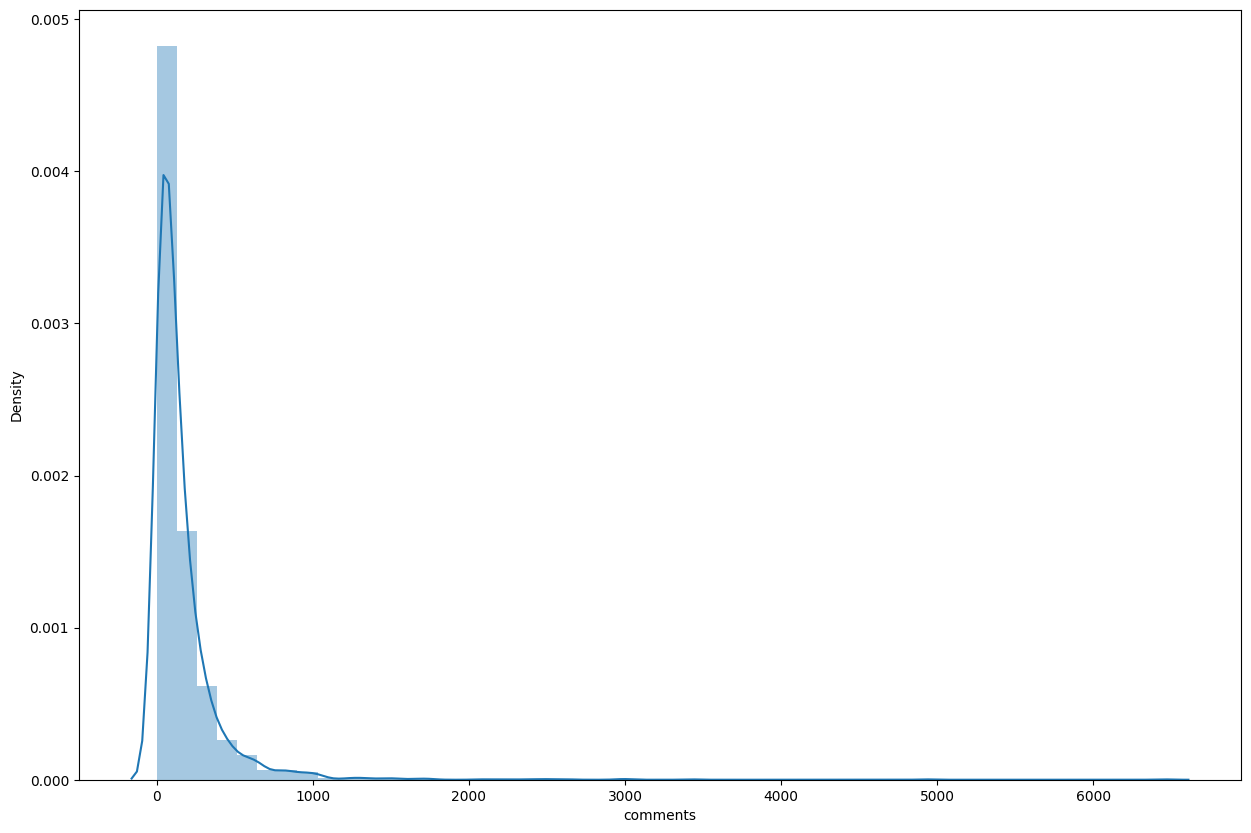

In [448]:
plt.figure(figsize=(15,10))
sns.distplot(newdf['comments'])

<Axes: xlabel='duration', ylabel='Density'>

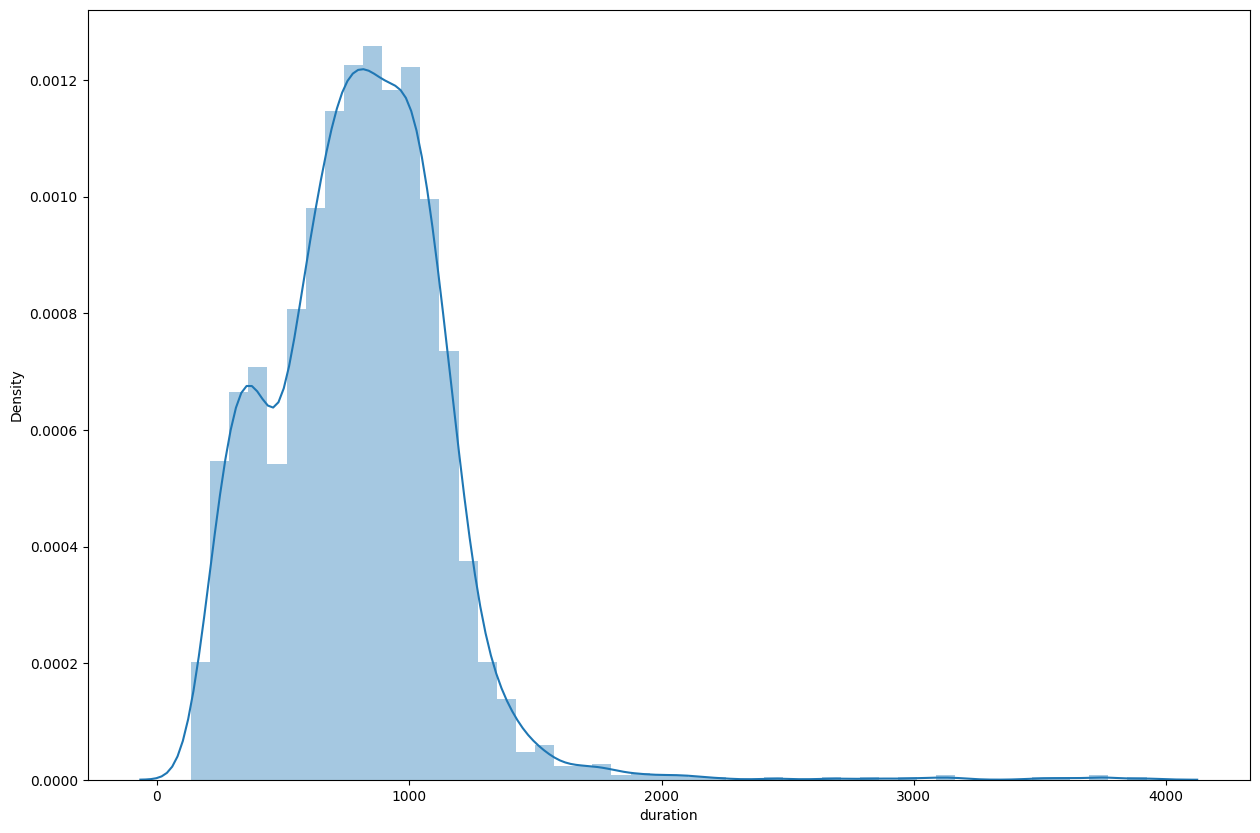

In [449]:
plt.figure(figsize=(15,10))
sns.distplot(newdf['duration'])

In [450]:
numeric_features = df.describe().columns

In [451]:
numeric_features

Index(['talk_id', 'views', 'comments', 'duration', 'days_taken_to_publish',
       'time_since_published', 'daily_views', 'year', 'day', 'num_of_lang',
       'num_of_tags', 'num_of_topics', 'topics_wise_avg_views'],
      dtype='object')

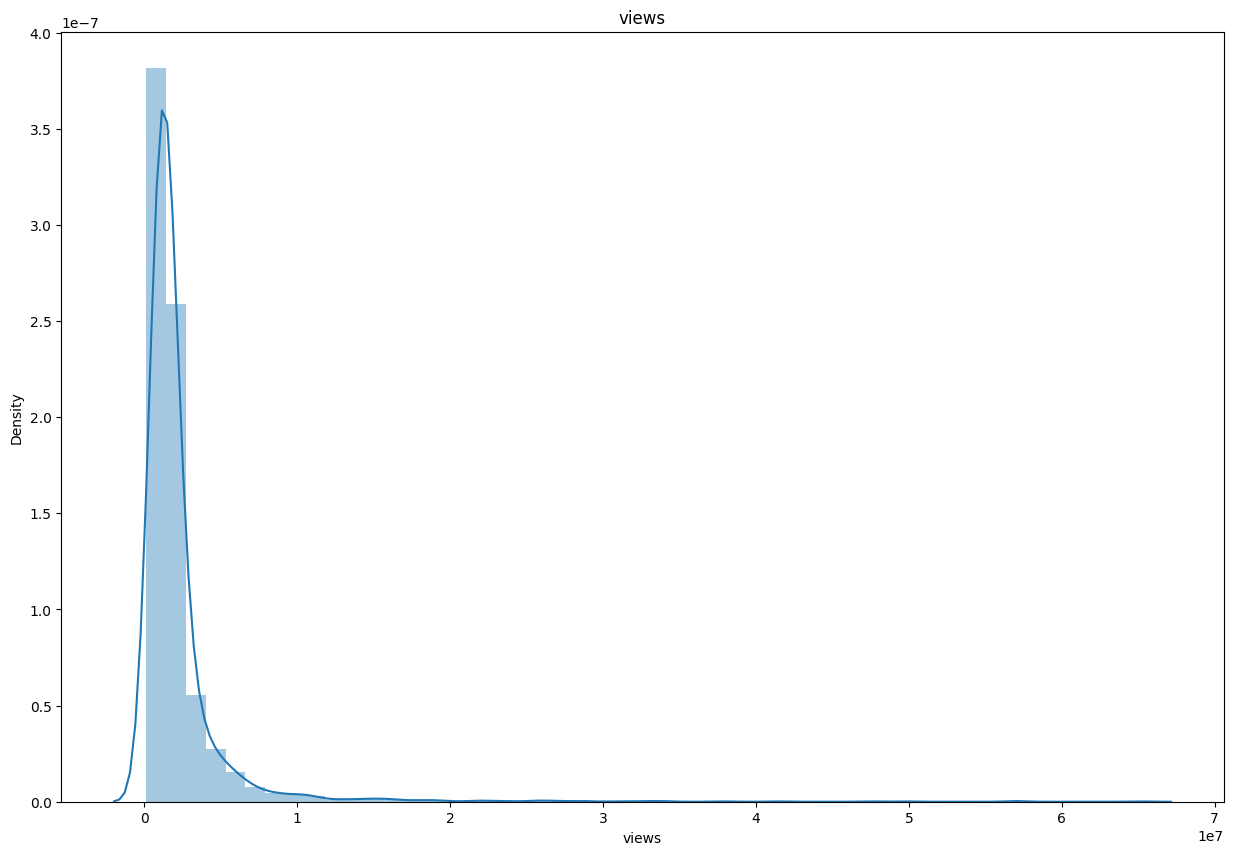

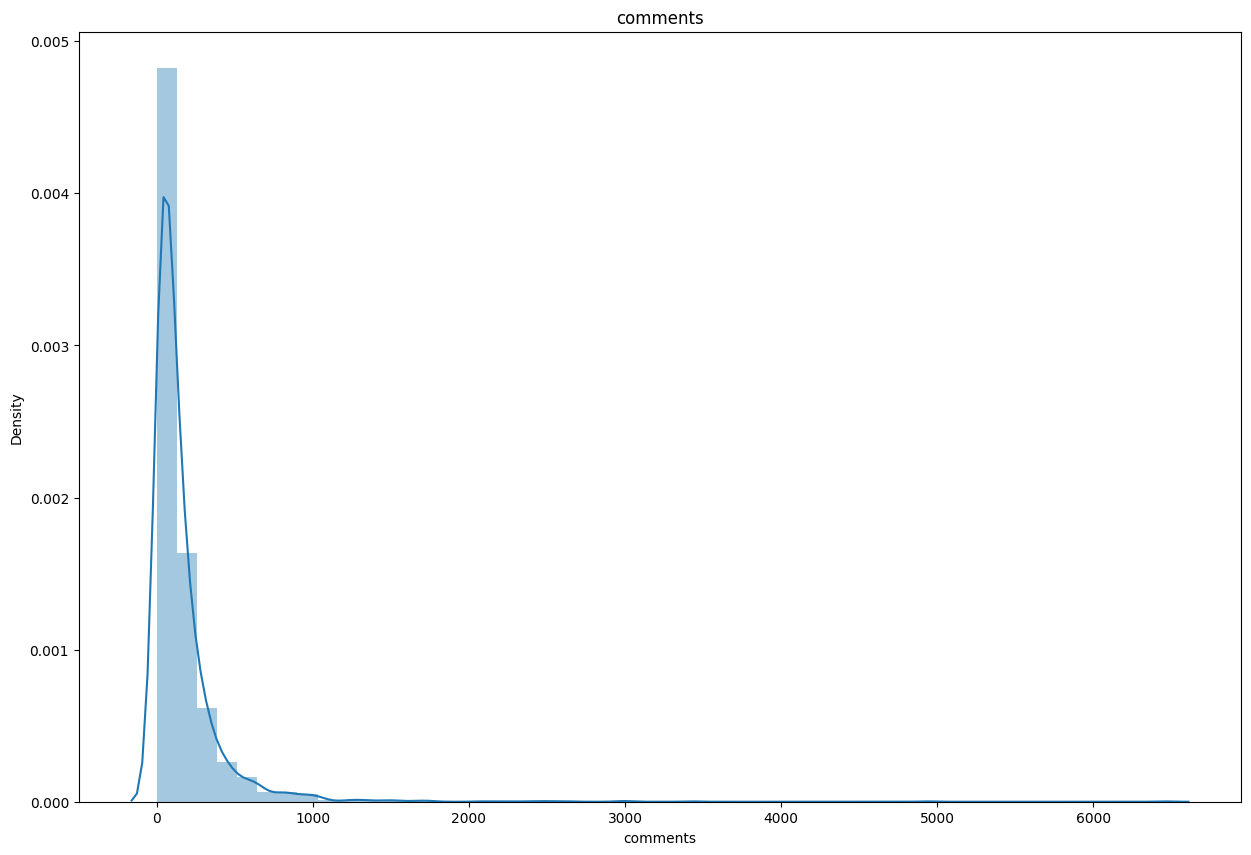

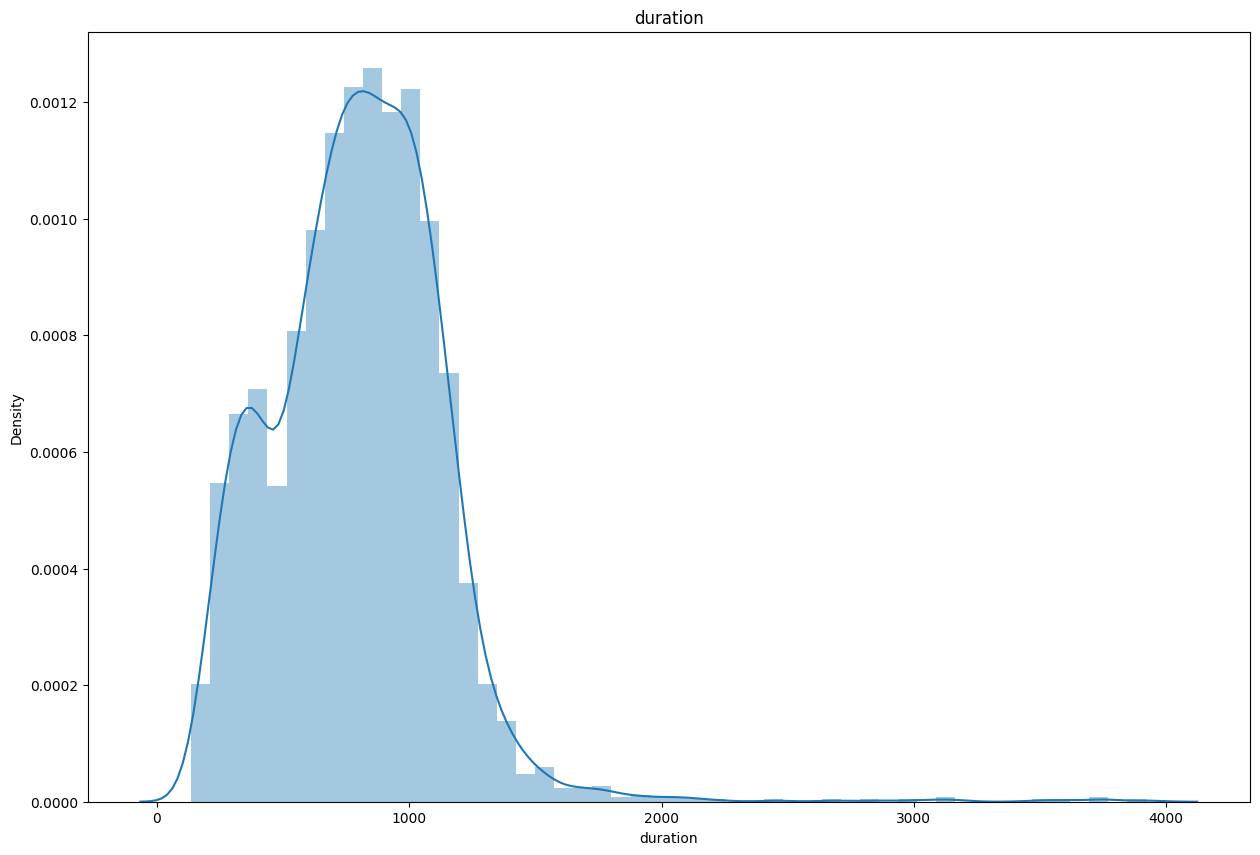

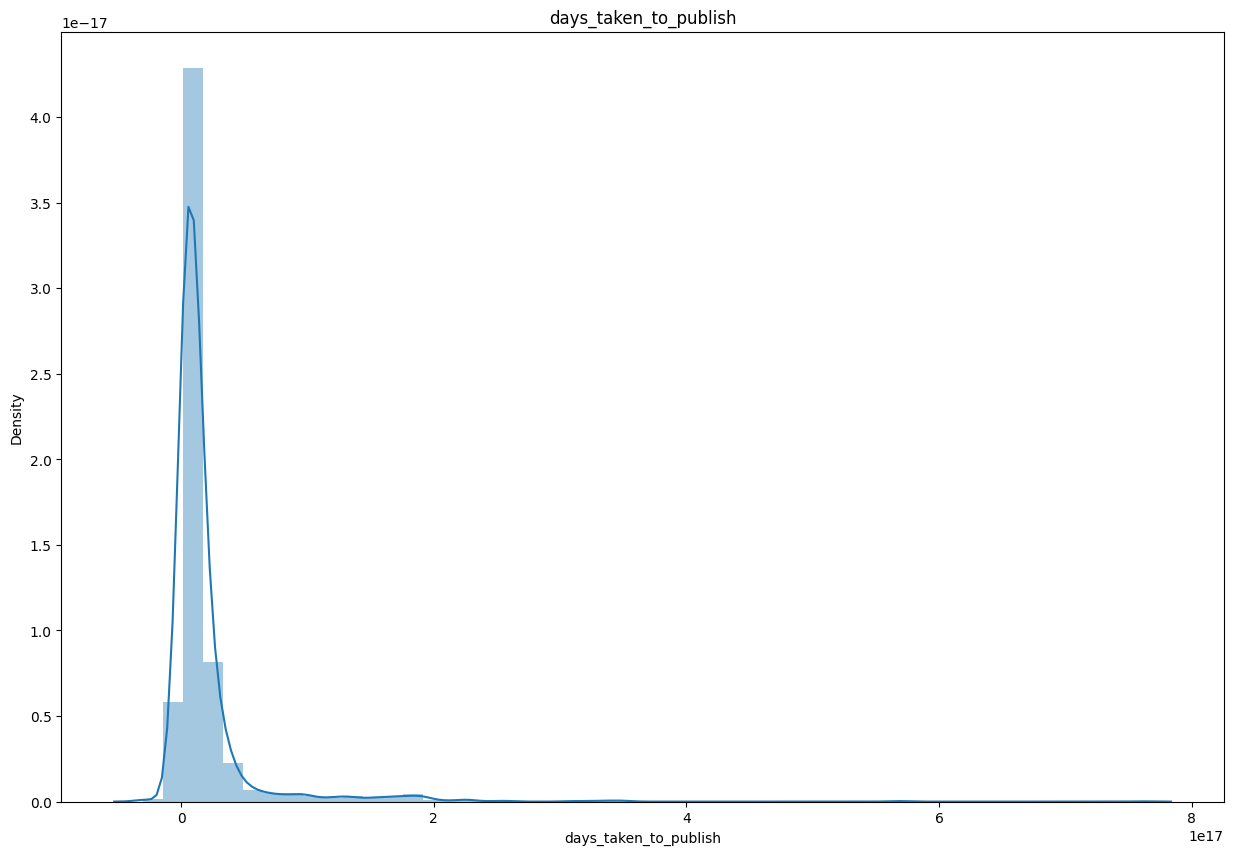

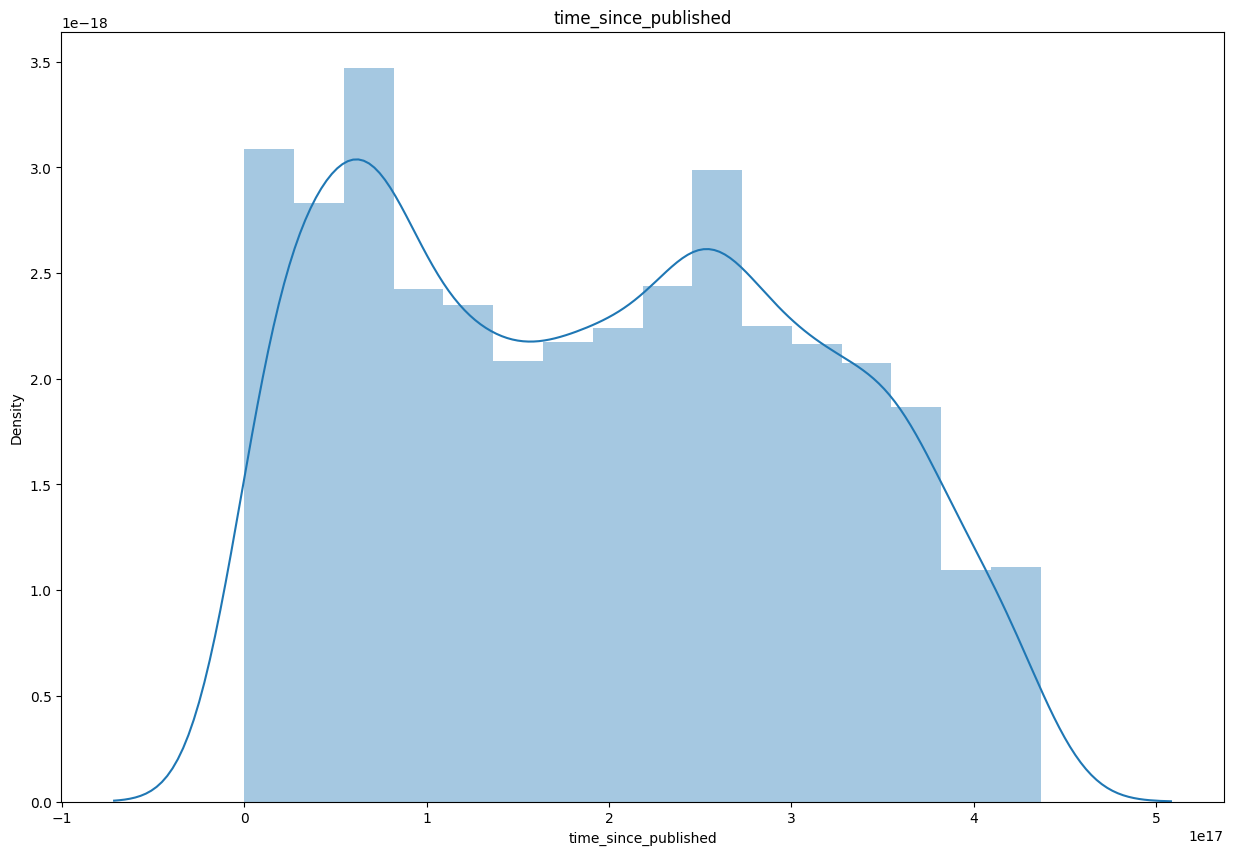

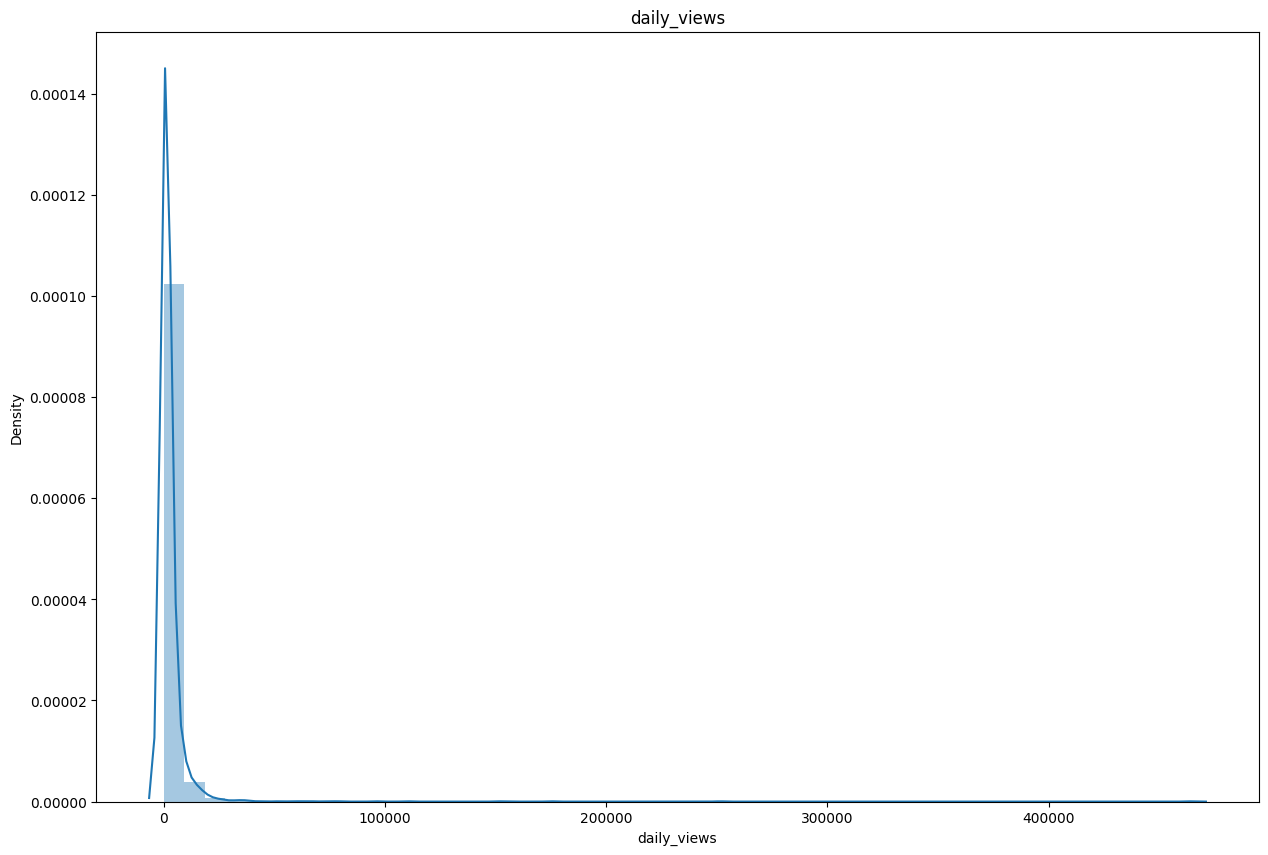

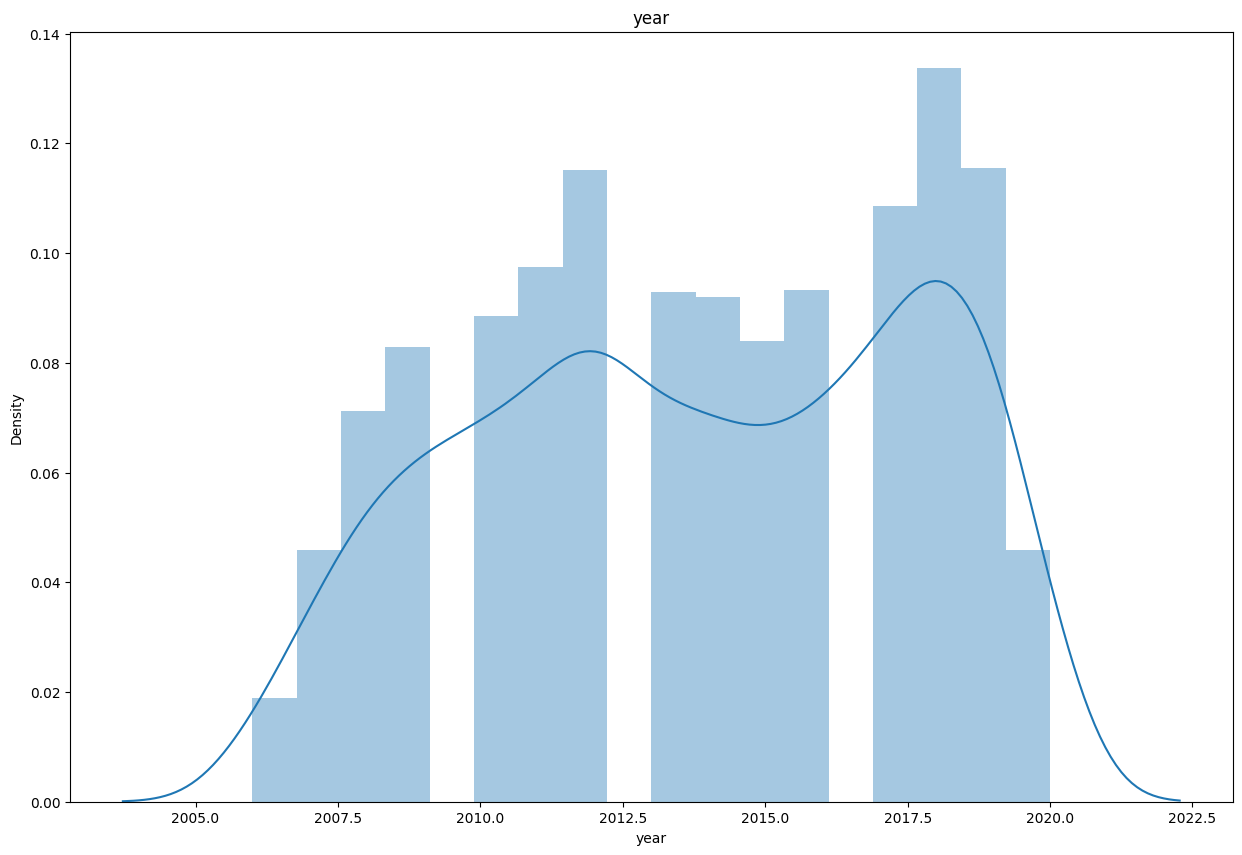

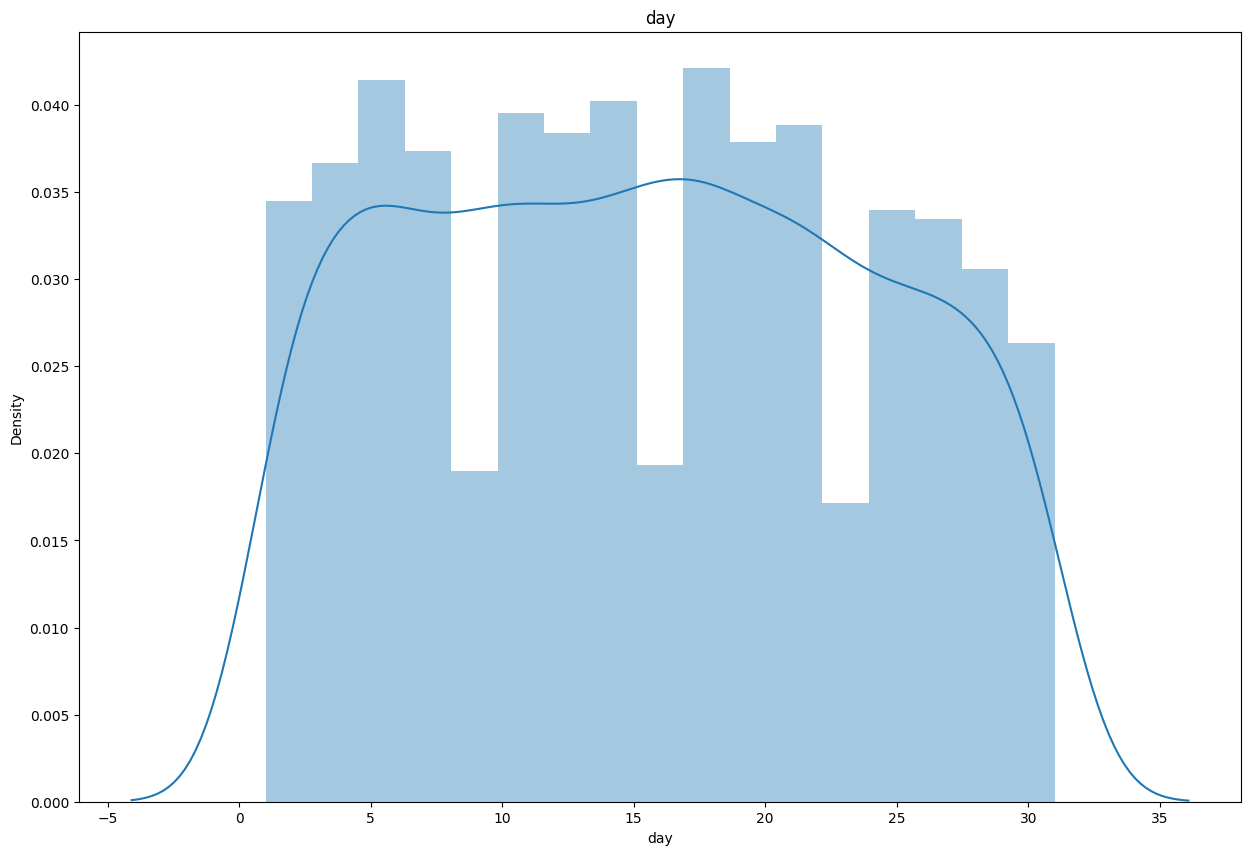

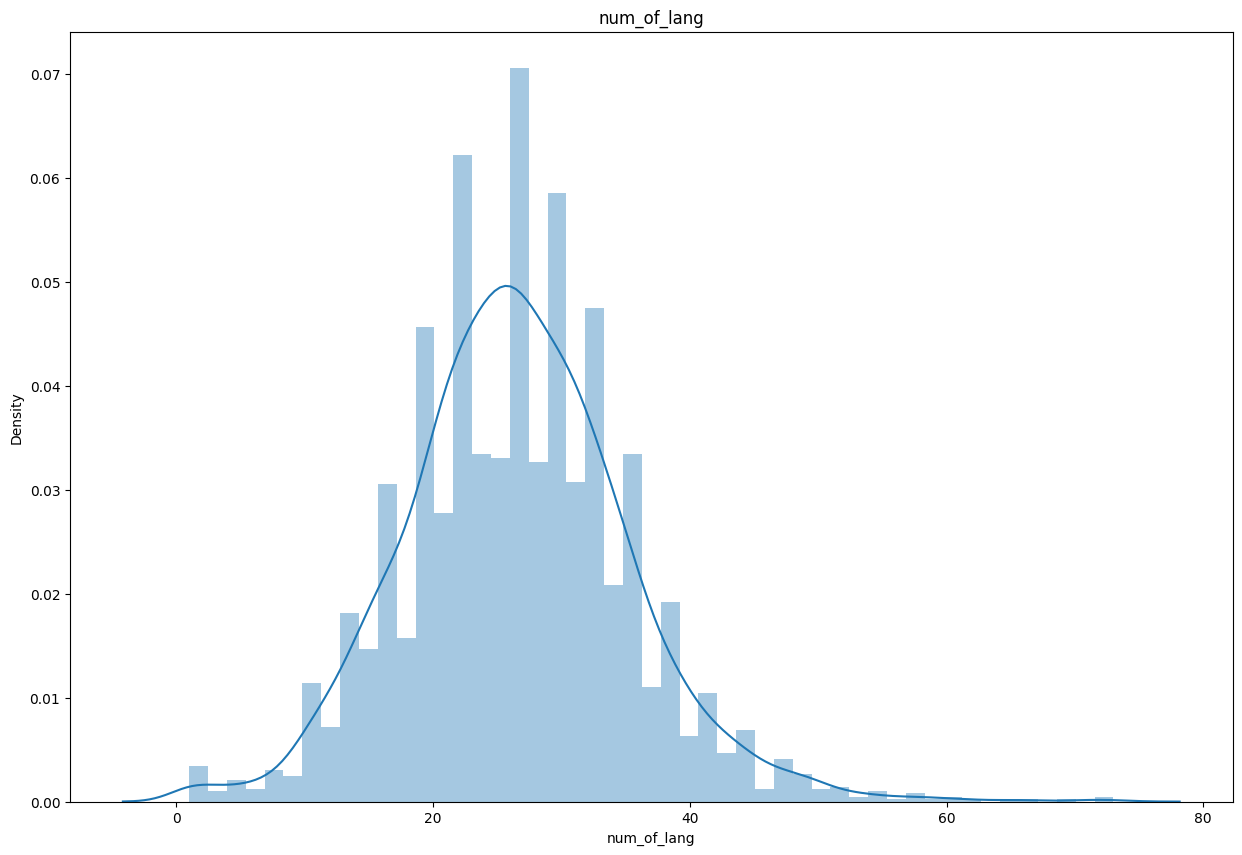

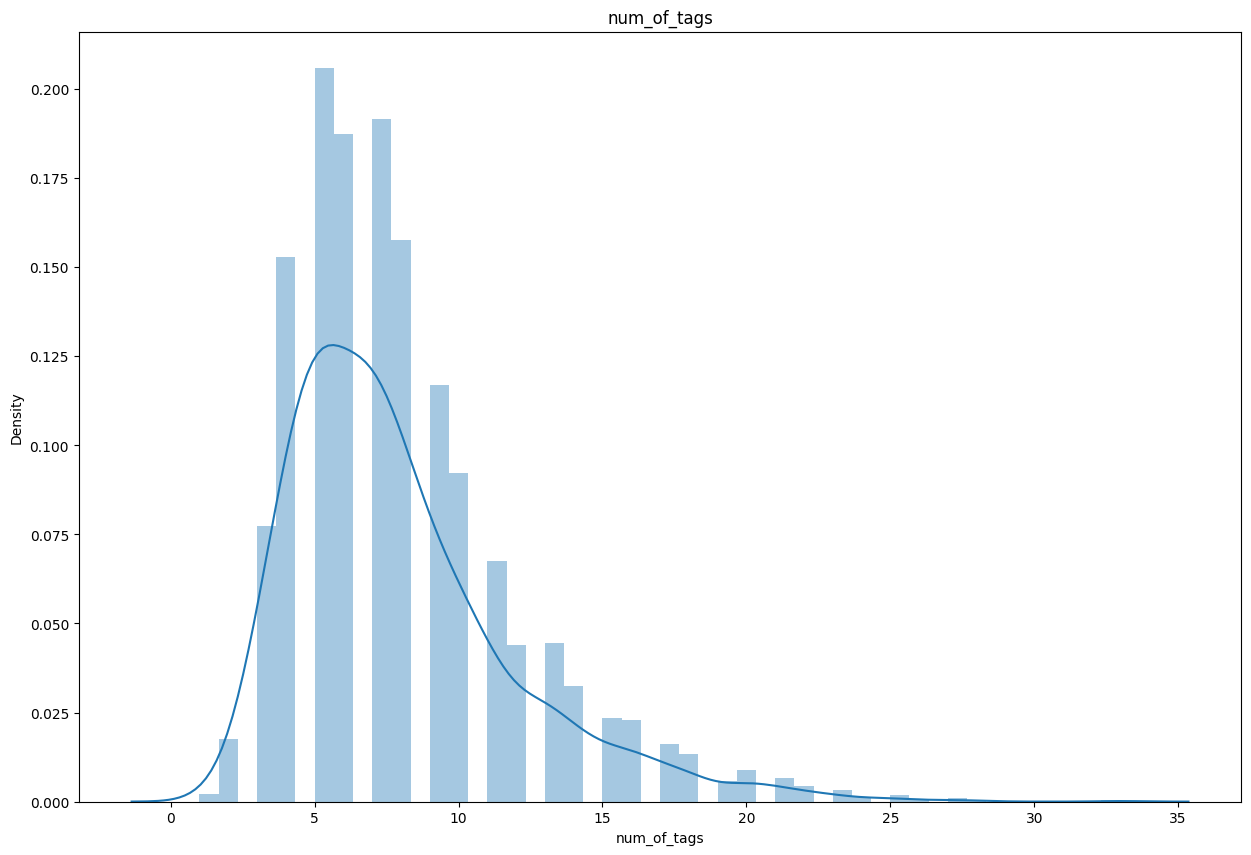

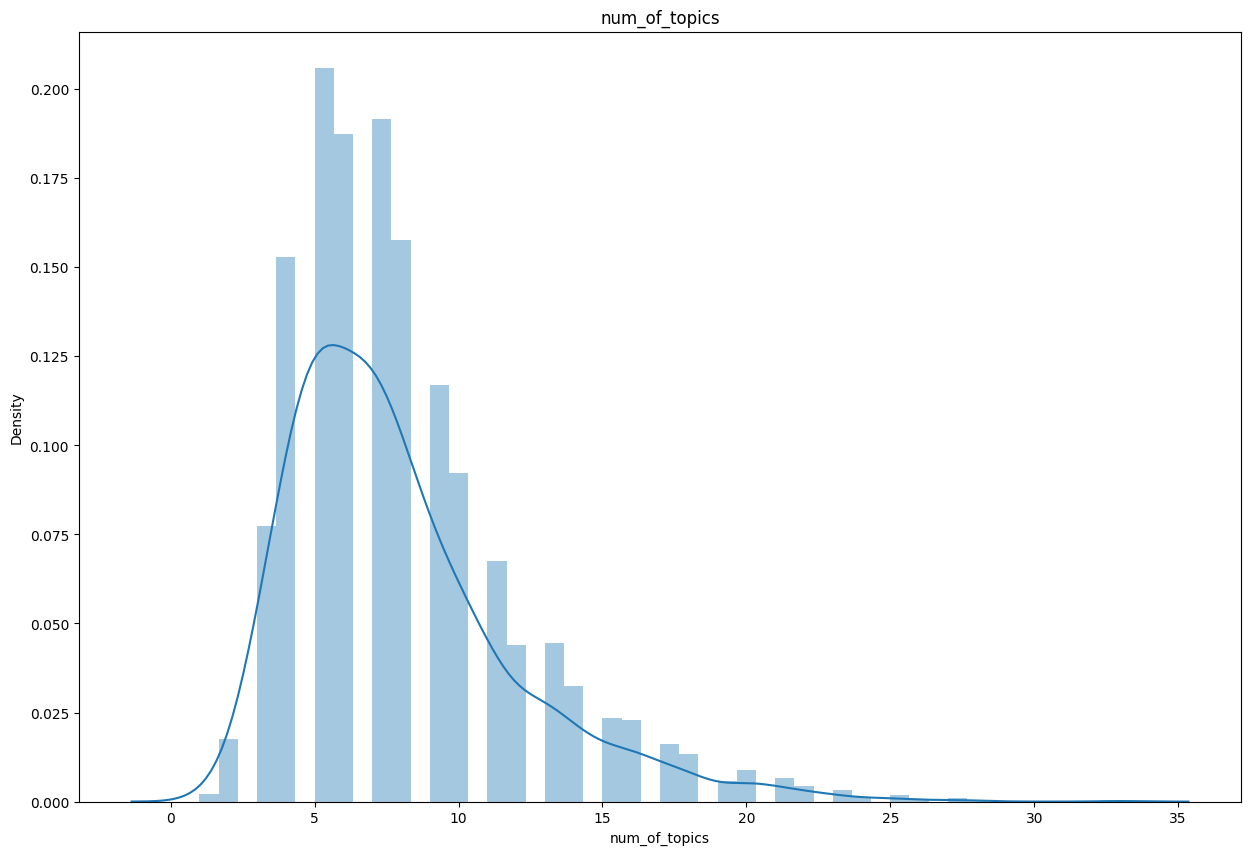

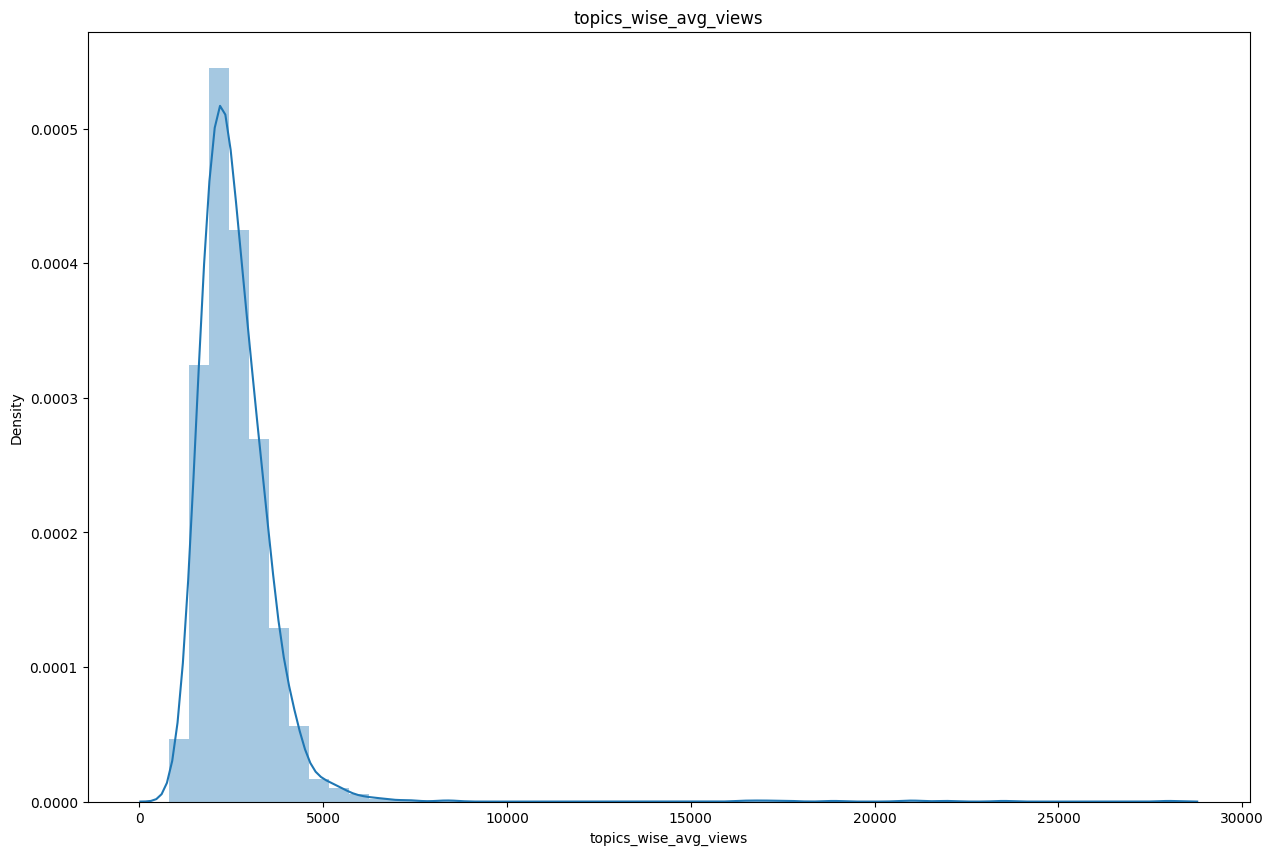

In [452]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature)
    ax.set_title(col)
plt.show()

In [453]:
# Creating a column speaker_1_avg_views.

pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

<Axes: xlabel='speaker_1_avg_views', ylabel='Density'>

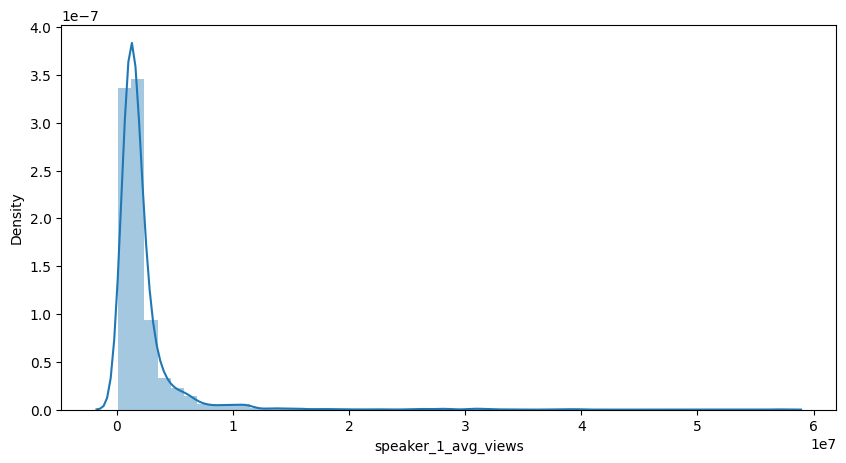

In [454]:
# Distribution of speaker_1_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

In [455]:
df.dtypes

talk_id                            int64
title                             object
speaker_1                         object
all_speakers                      object
occupations                       object
about_speakers                    object
views                              int64
recorded_date             datetime64[ns]
published_date            datetime64[ns]
event                             object
native_lang                       object
available_lang                    object
comments                         float64
duration                           int64
topics                            object
related_talks                     object
url                               object
description                       object
transcript                        object
days_taken_to_publish    timedelta64[ns]
time_since_published     timedelta64[ns]
daily_views                      float64
month                             object
year                               int64
day             

In [456]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'days_taken_to_publish', 'time_since_published', 'daily_views', 'month',
       'year', 'day', 'event_category', 'num_of_lang', 'num_of_tags',
       'num_of_topics', 'topics_wise_avg_views', 'speaker_1_avg_views'],
      dtype='object')

<h1>lets check correlation of each column with each other</h1>

,talk_id,views,comments,duration,daily_views,year,day,num_of_lang,num_of_tags,num_of_topics,topics_wise_avg_views,speaker_1_avg_views
talk_id,1.000000,-0.085996,-0.232949,-0.075302,0.375262,0.673623,0.002616,-0.553596,0.061659,0.061659,0.373163,-0.077305
views,-0.085996,1.000000,0.500676,0.077180,0.103926,-0.046984,-0.028954,0.364914,-0.022932,-0.022932,0.054650,0.884913
comments,-0.232949,0.500676,1.000000,0.175329,-0.023814,-0.307625,-0.015991,0.428687,-0.122573,-0.122573,-0.054870,0.443929
duration,-0.075302,0.077180,0.175329,1.000000,0.062467,-0.184099,0.001523,-0.246500,0.076945,0.076945,0.203329,0.089709
daily_views,0.375262,0.103926,-0.023814,0.062467,1.000000,0.235146,0.031307,-0.208599,0.014931,0.014931,0.407150,0.103676
year,0.673623,-0.046984,-0.307625,-0.184099,0.235146,1.000000,0.000487,-0.481286,0.274067,0.274067,0.368129,-0.032821
day,0.002616,-0.028954,-0.015991,0.001523,0.031307,0.000487,1.000000,0.002469,0.015046,0.015046,0.013199,-0.032585
num_of_lang,-0.553596,0.364914,0.428687,-0.246500,-0.208599,-0.481286,0.002469,1.000000,-0.170905,-0.170905,-0.230370,0.354577
num_of_tags,0.061659,-0.022932,-0.122573,0.076945,0.014931,0.274067,0.015046,-0.170905,1.000000,1.000000,0.140669,-0.033529
num_of_topics,0.061659,-0.022932,-0.122573,0.076945,0.014931,0.274067,0.015046,-0.170905,1.000000,1.000000,0.140669,-0.033529


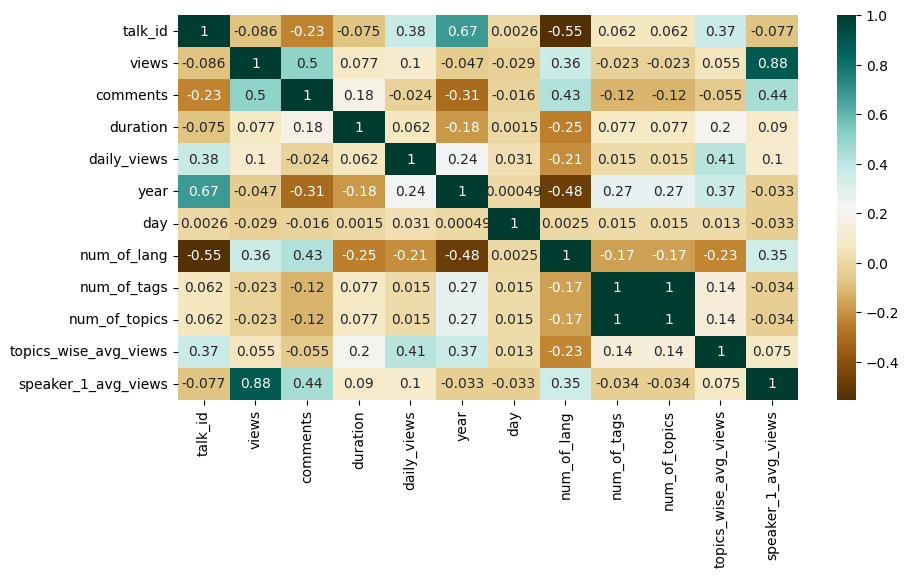

In [457]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

<h1>As from above graph , we can conclude one thing that , views are largely affect by speaker avg views and comments column .

So lets print the scatter plot of comments vs views.

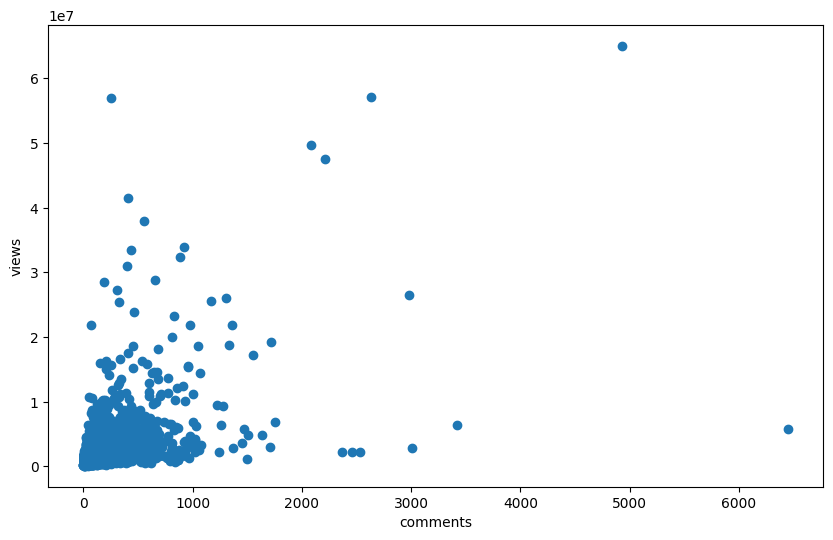

In [458]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['comments'], df['views'])
ax.set_xlabel('comments')
ax.set_ylabel('views')
plt.show()

In [459]:
df['occupations'].unique()

array(['climate advocate', 'global health expert; data visionary',
       'technology columnist', ..., 'artist storyteller',
       'epidemiologist philanthropist head of ted', 'law researcher'],
      dtype=object)

In [460]:
# First, seeing type of ted talk event
df['event'].value_counts()

TED2017                    96
TED2018                    95
TED2019                    91
TED2014                    83
TED2009                    81
                           ..
TEDSalon NY2015             1
TEDxIndianapolis            1
TEDxChapmanU                1
TEDxGoldenGatePark 2012     1
TEDxCreativeCoast           1
Name: event, Length: 428, dtype: int64

In [461]:
views = df['views']
comments = df['comments']

df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,daily_views,month,year,day,event_category,num_of_lang,num_of_tags,num_of_topics,topics_wise_avg_views,speaker_1_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,697.011276,Jun,2006,27,TED2000s,43,9,9,2185.0,2.190599e+06
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},global health expert; data visionary,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,2868.780415,Jun,2006,27,TED2000s,49,11,11,2045.0,3.987156e+06
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},technology columnist,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,379.986548,Jun,2006,27,TED2000s,26,9,9,1994.0,2.156190e+06
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},activist for environmental justice,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,527.016617,Jun,2006,27,TED2000s,35,9,9,2134.0,1.979411e+06
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},author educator,{0: 'Creativity expert Sir Ken Robinson challe...,65051954,2006-02-25,2006-06-27,TED2006,...,12868.833630,Jun,2006,27,TED2000s,62,7,7,2430.0,2.812684e+07


In [462]:
# Creating a new feature num_of_lang

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

<Axes: xlabel='num_of_lang', ylabel='Density'>

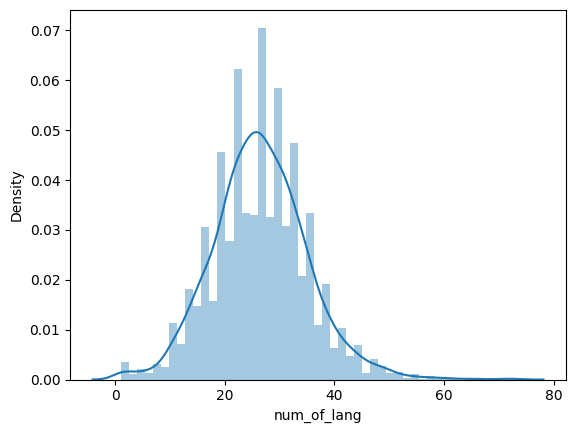

In [463]:
# Distplot to show distribution of num_of_lang column

sns.distplot(df['num_of_lang'])

In [464]:

df['num_of_topics'] = df.apply(lambda x: len(x['topics']), axis=1)

<Axes: xlabel='number_of_lang', ylabel='Density'>

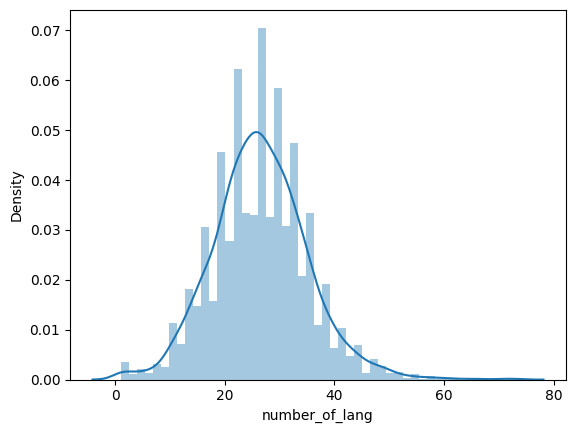

In [465]:
df['number_of_lang'] = df['available_lang'].apply(lambda x: len(x))
sns.distplot(df['number_of_lang'])

In [466]:
final_df=pd.DataFrame(df)

In [467]:

df.drop(['published_date', 'recorded_date'], axis=1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,event,native_lang,available_lang,...,month,year,day,event_category,num_of_lang,num_of_tags,num_of_topics,topics_wise_avg_views,speaker_1_avg_views,number_of_lang
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",...,Jun,2006,27,TED2000s,43,9,9,2185.0,2.190599e+06,43
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},global health expert; data visionary,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",...,Jun,2006,27,TED2000s,49,11,11,2045.0,3.987156e+06,49
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},technology columnist,{0: 'David Pogue is the personal technology co...,1920832,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",...,Jun,2006,27,TED2000s,26,9,9,1994.0,2.156190e+06,26
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},activist for environmental justice,{0: 'Majora Carter redefined the field of envi...,2664069,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",...,Jun,2006,27,TED2000s,35,9,9,2134.0,1.979411e+06,35
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},author educator,{0: 'Creativity expert Sir Ken Robinson challe...,65051954,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",...,Jun,2006,27,TED2000s,62,7,7,2430.0,2.812684e+07,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,62628,How to shift your mindset and choose your future,Tom Rivett-Carnac,{0: 'Tom Rivett-Carnac'},political strategist,{0: 'A political strategist focused on creatin...,772022,TED2020: The Prequel,en,"[en, pt-br]",...,Apr,2020,22,TED2000s,2,8,8,4270.0,7.720220e+05,2
3334,62627,An ode to living on Earth,Oliver Jeffers,{0: 'Oliver Jeffers'},artist storyteller,"{0: 'With a style that crackles with wry wit, ...",672908,TED2020: The Prequel,en,"[ar, en, fa, fr, tr]",...,Apr,2020,22,TED2000s,5,11,11,4171.0,6.729080e+05,5
3335,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: 'Larry Brilliant', 1: 'Chris Anderson'}",epidemiologist philanthropist head of ted,{0: 'TED Prize winner Larry Brilliant has spen...,760969,TED2020: The Prequel,en,"[en, es, it, pt-br]",...,Apr,2020,24,TED2000s,4,8,8,21978.0,8.459110e+05,4
3336,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},health activist,"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,TED2020: The Prequel,en,[en],...,Apr,2020,27,TED2000s,1,7,7,4656.0,8.569210e+05,1


In [468]:
df.dtypes

talk_id                            int64
title                             object
speaker_1                         object
all_speakers                      object
occupations                       object
about_speakers                    object
views                              int64
recorded_date             datetime64[ns]
published_date            datetime64[ns]
event                             object
native_lang                       object
available_lang                    object
comments                         float64
duration                           int64
topics                            object
related_talks                     object
url                               object
description                       object
transcript                        object
days_taken_to_publish    timedelta64[ns]
time_since_published     timedelta64[ns]
daily_views                      float64
month                             object
year                               int64
day             

so before going for machine learning , lets apply log to the numerical column just to put all points in close or in proper manner.

In [469]:
df['log_daily_views']=np.log(df['daily_views'])


In [470]:
df['log_comments']=np.log(df['comments'])
df['log_speaker_1_avg_views']=np.log(df['speaker_1_avg_views'])


In [471]:
df['log_comments']=np.log(df['comments'])

In [472]:
df['log_duration']=np.log(df['duration'])
df['log_topics_wise_avg_views']=np.log(df['topics_wise_avg_views'])


In [473]:
df.reset_index(inplace = True,drop = True)

In [474]:
df['log_views']=np.log(df['views'])

lets observe the graph of duration and daily views.

<h1><b>Before going to actual implementation of machine learning algorithm's , we have to first remove all outliers of features we kept for analysis.

In [475]:
q_low = df['log_daily_views'].quantile(0.01)
q_hi  = df['log_daily_views'].quantile(0.99)

df['log_daily_views'] = (df['log_daily_views'] < q_hi) & (df['log_daily_views'] > q_low)

In [476]:
q_low = df["log_duration"].quantile(0.01)
q_hi  = df["log_duration"].quantile(0.99)

df["log_duration"] =(df["log_duration"] < q_hi) & (df["log_duration"] > q_low)

In [477]:
# removing outliers from log_comments
q_low = df['log_comments'].quantile(0.01)
q_hi  = df['log_comments'].quantile(0.99)

df['log_comments'] = (df['log_comments'] < q_hi) & (df['log_comments']> q_low)

In [478]:
q_low = df["number_of_lang"].quantile(0.01)
q_hi  = df["number_of_lang"].quantile(0.99)

df["number_of_lang"] = (df["number_of_lang"] < q_hi) & (df["number_of_lang"] > q_low)

In [479]:
q_low = df["log_topics_wise_avg_views"].quantile(0.01)
q_hi  = df["log_topics_wise_avg_views"].quantile(0.99)

df["log_topics_wise_avg_views"] = (df["log_topics_wise_avg_views"] < q_hi) & (df["log_topics_wise_avg_views"] > q_low)

In [480]:
print(df.isnull().sum())

talk_id                      0
title                        0
speaker_1                    0
all_speakers                 0
occupations                  0
about_speakers               0
views                        0
recorded_date                0
published_date               0
event                        0
native_lang                  0
available_lang               0
comments                     0
duration                     0
topics                       0
related_talks                0
url                          0
description                  0
transcript                   0
days_taken_to_publish        0
time_since_published         0
daily_views                  0
month                        0
year                         0
day                          0
event_category               0
num_of_lang                  0
num_of_tags                  0
num_of_topics                0
topics_wise_avg_views        0
speaker_1_avg_views          0
number_of_lang               0
log_dail

In [481]:
df.describe().columns

Index(['talk_id', 'views', 'comments', 'duration', 'days_taken_to_publish',
       'time_since_published', 'daily_views', 'year', 'day', 'num_of_lang',
       'num_of_tags', 'num_of_topics', 'topics_wise_avg_views',
       'speaker_1_avg_views', 'log_speaker_1_avg_views', 'log_views'],
      dtype='object')

creating final data frame

In [482]:

df1=df[['log_topics_wise_avg_views','log_duration','log_speaker_1_avg_views','log_comments' , 'log_daily_views' , 'log_views']]

In [483]:
# Importing feature selection library

from sklearn.feature_selection import f_regression

<h3>f_regression is Univariate linear regression tests returning F-statistic and p-values.<h3

<h3>f_regression is therefore recommended as a feature selection criterion to identify potentially predictive feature for a downstream classifier, irrespective of the sign of the association with the target variable.</h3>

<h1>we got some observation that our database has some different kind of inputs which are creating the obstacles while applying algorithm

In [484]:
np.isnan(df1) #and gets False
#and gets True

,log_topics_wise_avg_views,log_duration,log_speaker_1_avg_views,log_comments,log_daily_views,log_views
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3333,False,False,False,False,False,False
3334,False,False,False,False,False,False
3335,False,False,False,False,False,False
3336,False,False,False,False,False,False


In [485]:
np.isfinite(df1)

,log_topics_wise_avg_views,log_duration,log_speaker_1_avg_views,log_comments,log_daily_views,log_views
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
3333,True,True,True,True,True,True
3334,True,True,True,True,True,True
3335,True,True,True,True,True,True
3336,True,True,True,True,True,True


In [486]:
 df1.reset_index()

,index,log_topics_wise_avg_views,log_duration,log_speaker_1_avg_views,log_comments,log_daily_views,log_views
0,0,True,True,14.599686,True,True,15.074935
1,1,True,True,15.198589,True,True,16.489775
2,2,True,True,14.583853,True,True,14.468269
3,3,True,True,14.498310,True,True,14.795365
4,4,True,True,17.152235,False,True,17.990697
...,...,...,...,...,...,...,...
3333,3333,True,True,13.556768,True,False,13.556768
3334,3334,True,True,13.419364,True,False,13.419364
3335,3335,False,True,13.648169,True,False,13.542348
3336,3336,True,True,13.661101,True,False,13.128214


<h1><b>so let create one method which is used to clean the database

In [487]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [488]:
df1 = clean_dataset(df1)

<h1><b>so now we have clean database</b></h1>

<h1>so lets seperate dependent and idependent variable</h1>

In [489]:
y=df1['log_views']
X=df1.drop(columns=['log_views'])


In [490]:
# Printing f_scores for independent features.

f_scores = f_regression(X, y)
f_scores

(array([2.48428156e+01, 2.22457725e+00, 2.15767256e+04, 1.07147493e-01,
        9.77643273e+01]),
 array([6.53682866e-07, 1.35924382e-01, 0.00000000e+00, 7.43435881e-01,
        9.65223326e-23]))

In [491]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121212)

 Standardize features by removing the mean and scaling to unit variance.

 The standard score of a sample x is calculated as:

 z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [492]:
# Importing StandardScaler from sklearn library

from sklearn.preprocessing import StandardScaler

# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [493]:
# Importing library

from sklearn.linear_model import LinearRegression
from sklearn import metrics

## When implementing simple linear regression, you typically start with a given set of input-output (𝑥-𝑦) pairs.

 Our goal is to calculate the optimal values of the predicted weights 𝑏₀ and 𝑏₁ that minimize SSR and determine the estimated regression function.

 the distance beetween actuall and predicted should be less


In [494]:
# Fitting the data

lin_reg = LinearRegression().fit(X_train, y_train)

In [495]:
# Predicting the values for test set

y_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

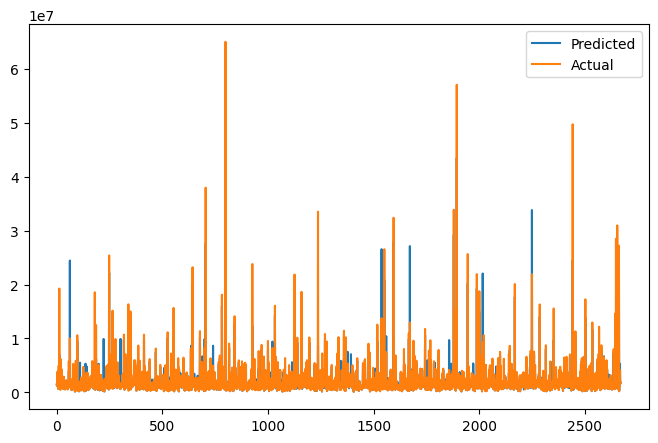

In [496]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [497]:
# Calculating MSE and RMSE for test data set

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

MSE is 0.1114690576998175
RMSE is 0.3338698214870843


In [498]:
from sklearn.metrics import accuracy_score

In [499]:
from sklearn.metrics import r2_score
# Evaluate accuracy
R2score= r2_score(y_test, y_test_pred)
print(R2score)

0.8418455246077207


In [500]:
# Printing MAE for training and test set.

print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.13
Test MAE: 0.15


Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

An extra-trees regressor.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Stack of estimators with a final regressor.

Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [501]:
# Importing libraries.

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor

In [502]:
# Fitting the data

rf = RandomForestRegressor(criterion='friedman_mse',max_depth=15, n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))



Training MAE: 0.11
Test MAE: 0.17


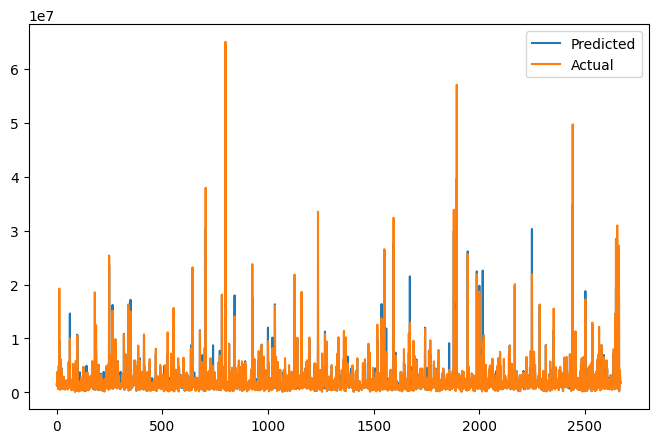

In [503]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [504]:
metrics.mean_squared_error(y_train, y_pred)

0.05742768025661631

In [505]:
metrics.r2_score(y_train, y_pred)

0.9064453453136614

Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In [506]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [507]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [30,50,80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150,200,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50,60,80]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [508]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.4s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.3s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.4s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.4s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.3s
[CV] END ma

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200, 20],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]},
                   verbose=2)

In [509]:
# Let's see which set of hyperparameters are optimal.

rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                      n_estimators=50)

In [510]:
# Now, calculating MAE for training and test set.

y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.13
Test MAE: 0.15


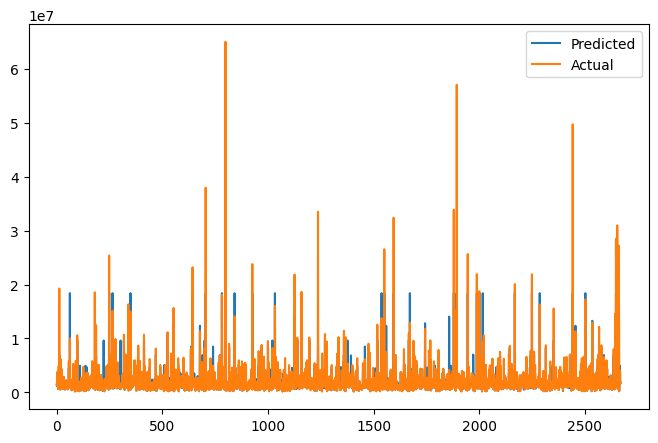

In [511]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [512]:
# Importing r2_score


# Calculating R-squared value.

y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 score is :{r_squared}')
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.876310582447748
R2 score is :0.820020047476136
For test set the R_Squared for RFforest is 0.820020047476136 and adjusted R_Squared is 0.8197499695161662


In [513]:
# Importing library

from xgboost import XGBRegressor

In [514]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

 XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm. The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

In [515]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.05)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[12:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[12:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[12:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[12:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[12:15:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [516]:
# Let's see which set of hyperparameters are optimal

xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, min_samples_leaf=50, min_samples_split=100,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [517]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 score is :{r_squared}')
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8853253964296711
R2 score is :0.8099194300819823
For test set the R_Squared for XGBoost is 0.8099194300819823 and adjusted R_Squared is 0.8096341951331257


In [518]:
# Calculating MAE for training and test set.

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.17
Test MAE: 0.21


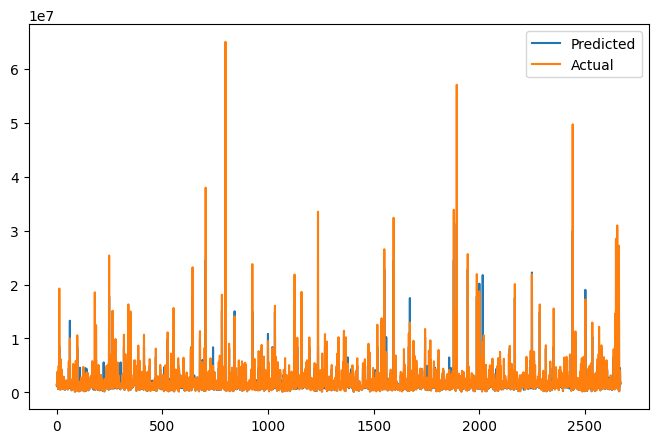

In [519]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

do some

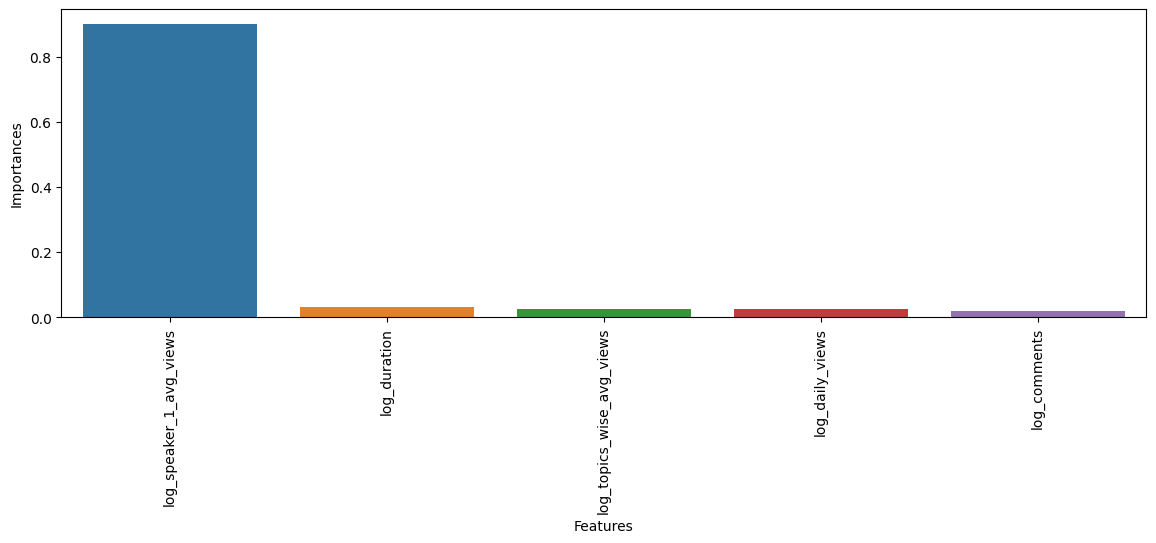

In [520]:
# Barplot to show important features.

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': xgb_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

In [521]:
# Importing library.

from sklearn.ensemble import ExtraTreesRegressor

In [522]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [523]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor()

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.1s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [524]:
# Let's see optimal set of hyperparameters for this model.

et_optimal_model = et_random.best_estimator_
et_optimal_model

ExtraTreesRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=150,
                    n_estimators=80)

In [525]:
# Calculating MAE for training and test set

y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.18
Test MAE: 0.20


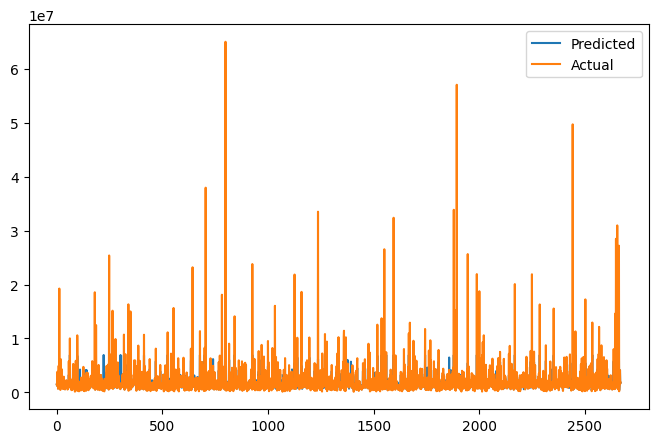

In [526]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [527]:
# Making predictions for test data and also calculating r2_score

y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 score is :{r_squared}')
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.876310582447748
R2 score is :0.7840398930942235
For test the R_Squared for ExtraTreesRegressor is 0.7840398930942235 and adjusted R_Squared is 0.7837158233059496


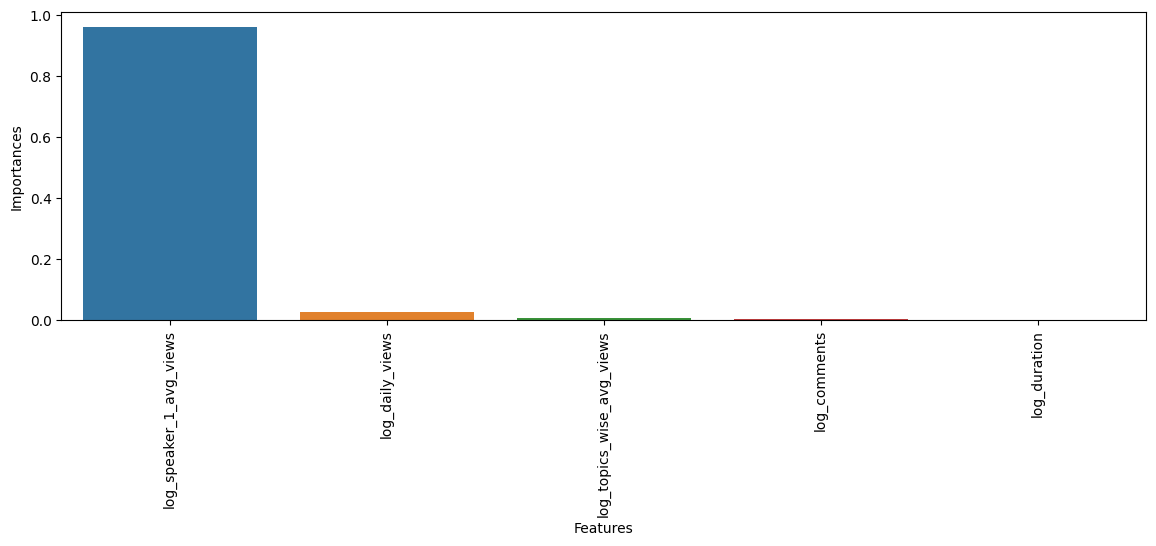

In [528]:
# Barplot to show important features w.r.t. ExtraTreesRegressor model

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': et_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value. Gradient boosting builds an additive mode by using multiple decision trees of fixed size as weak learners or weak predictive models.

In [529]:
# Importing necessary libraries

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [530]:
xgbr = xgb.XGBRegressor(criterion='mae', earning_rate=0.1, max_depth=10, subsample=0.5, n_estimators=20, min_child_weight=2, random_state=2019)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

[12:15:37] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "earning_rate" } are not used.

Training MAE: 0.12
Test MAE: 0.17


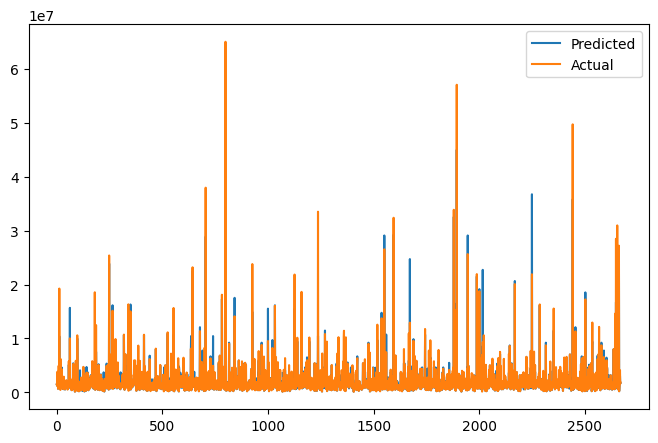

In [531]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

In [532]:
et = ExtraTreesRegressor(criterion='friedman_mse', max_depth=30, n_estimators=1000, random_state=2019, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.11
Test MAE: 0.16


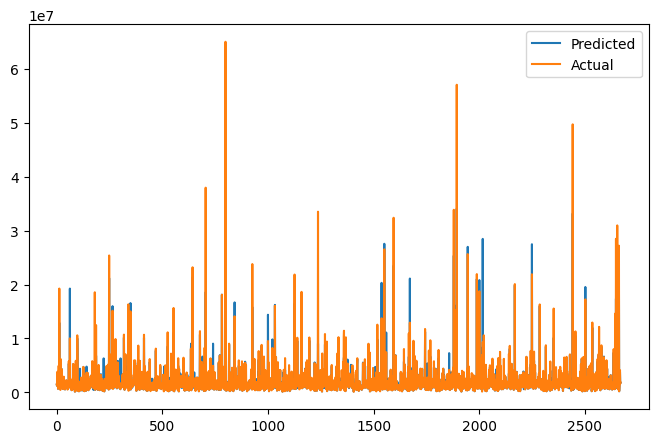

In [533]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

LightGBM is an open-source gradient boosting framework that based on tree learning algorithm and designed to process data faster and provide better accuracy. It can handle large datasets with lower memory usage and supports distributed learning

In [534]:
import lightgbm as lgb

In [535]:
lgbm = lgb.LGBMRegressor(max_depth=5, n_estimators=50, random_state=2019)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.13
Test MAE: 0.15


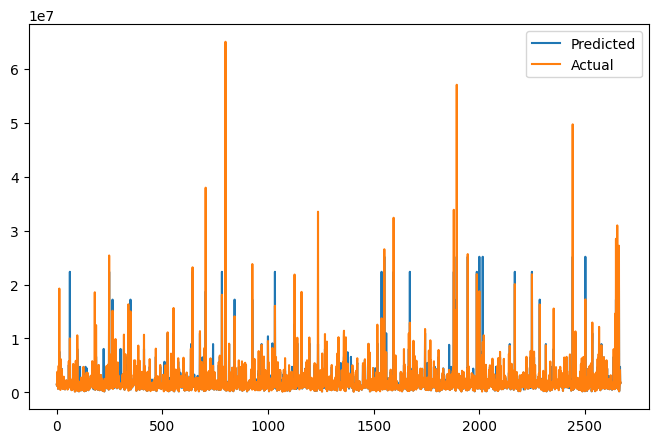

In [536]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(y_pred))
plt.plot(np.array(np.exp(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

Introduction to Lasso Regression
This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

Lasso Regression for Regularization
In this shrinkage technique, the coefficients determined in the linear model from equation 1.1. above are shrunk towards the central point as the mean by introducing a penalization factor called the alpha α (or sometimes lamda) values.

In [537]:
#Lasso Regression


from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
Lasso_reg = Lasso(alpha=1.0)
#Fitting the Training data to the Lasso regressor
Lasso_reg.fit(X_train, y_train)
#Predicting for X_test
y_pred_lass = Lasso_reg.predict(X_test)
#Printing the Score with RMLSE
train_score_ls = Lasso_reg.score(X_train,y_train)
test_score_ls = Lasso_reg.score(X_test,y_test)

In [538]:
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.0
The test score for ls model is -0.0019202721900040132


Selecting Optimal Alpha Values Using Cross-Validation in Sklearn We may need to try out different alpha values to find the optimal constraint value.

For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.

In [539]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.8756237632904734
0.8420035694033566


In [540]:
from sklearn.linear_model import Ridge, RidgeCV
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.8756177869634927
The test score for ridge model is 0.8419305875351779


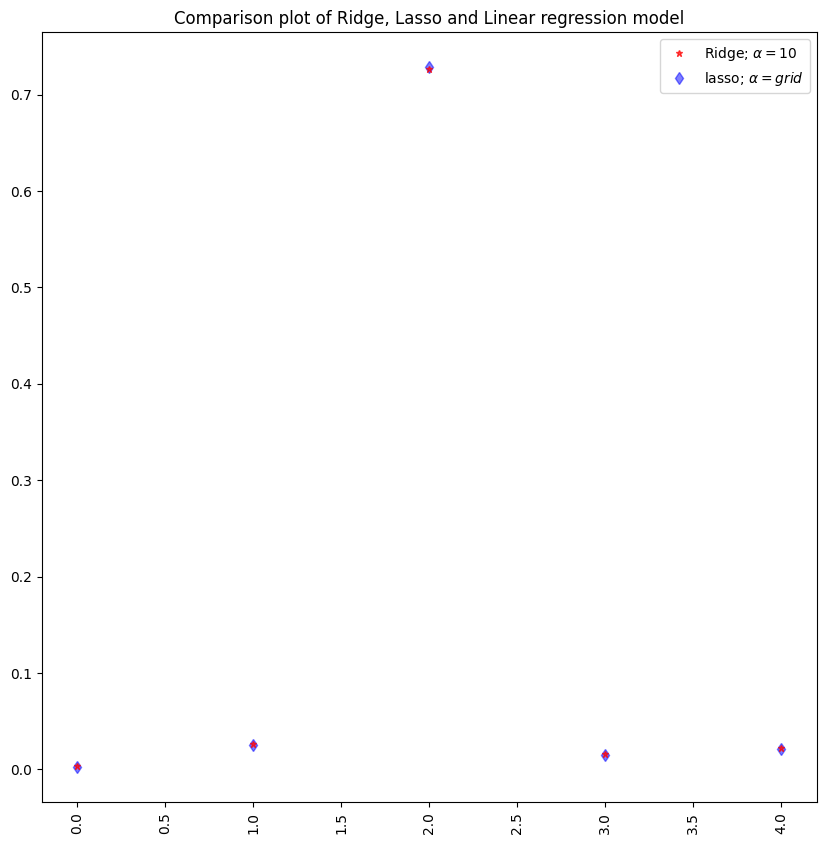

In [541]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#addd plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

Note: A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

In [542]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.8756300008193852
The train score for ridge model is 0.8418551564111553


In [543]:
Lasso_reg = Lasso(alpha=1.0)

In [544]:
# Instantiating all these models

models = [
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor(criterion='friedman_mse',max_depth=15, max_features=5, n_estimators=120, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='friedman_mse', max_depth=30, n_estimators=200, random_state=2019, min_samples_leaf=2, min_samples_split=6)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['LinearRegression' , LinearRegression().fit(X_train, y_train)],
           ['LGBMRegressor'  , lgb.LGBMRegressor(max_depth=5, n_estimators=50, random_state=2019)],
           ['Lasso' ,Lasso_reg.fit(X_train, y_train)],
           ['LassoCV' , LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)],
           ['Ridge' ,Ridge(alpha=10)],
           ['RidgeCV' , RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)]
         ]

In [545]:
# Fitting the models

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train, y_train)
    curr_model_data["Train_MAE"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["Test_MAE"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [546]:
# Creating a dataframe of all results.

results_df = pd.DataFrame(model_data)
results_df

,Name,Train_MAE,Test_MAE,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,SVR:,0.129303,0.163379,0.875799,0.790212,0.384527
1,RandomForest,0.105726,0.171207,0.906424,0.778233,0.395353
2,ExtraTreeRegressor :,0.112327,0.160566,0.901452,0.803992,0.371683
3,GradientBoostingRegressor:,0.116375,0.153456,0.898673,0.813437,0.362618
4,XGBRegressor:,0.088209,0.182725,0.926567,0.729149,0.436920
5,LinearRegression,0.127470,0.147540,0.875630,0.841846,0.333870
6,LGBMRegressor,0.125112,0.147777,0.881766,0.830939,0.345189
7,Lasso,0.565506,0.613025,0.000000,-0.001920,0.840336
8,LassoCV,0.127668,0.147624,0.875624,0.842004,0.333703
9,Ridge,0.128251,0.148266,0.875618,0.841931,0.333780


# **Conclusion**

<h1><b>Conclusion


<h1>The closer MAE is to 0, the more accurate the model is. But MAE is returned on the same scale as the target you are predicting for and therefore there isn't a general rule for what a good score is.

<h1>The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

<h1> We have seen an implementation of ridge and lasso regression models.

<h1>Some of the key takeaways from this tutorial include:

<h1>The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.  An alpha value of zero in either ridge or lasso model will have results similar to the regression model. The larger the alpha value, the more aggressive the penalization.

<h1><b>As shown in the result table, the Extra Trees Regression was the most accurate regression method as it has the lowest MAE either on the training records or in the test records. On the other hand, the LightGBM Regression was the fastest regression method. Actually, reducing the n_estimators in the random forest or the Extra trees could reduce their fitting time, but unfortunately their accuracies will also decrease.

<h1>
That's it we have reached the end of this project. We started the project with Data Exploration in which we faced many challenges as dataset included data in many different data structures which was bit complicated to extract but the most challenging part of EDA was dealing catagorical variables, it took lot of research to deal with such large number of catagorical variables. Following EDA we performed feature engineering, data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

<h1>Then we checked our model for overfitting by comparing it with Lasso Regression model, Ridge Regression model.





<h1>After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing.

<h1>Given that only have 13 % errors, our models have performed very well on unseen data due to various factors like effecive EDA,feature selection,correct model selection.

<h1>In all the features speaker_1_avg_views is most important this implies that speakers are directly impacting the views.

<h1><b>
Future Work


<h1>Improve feature engineering
Remove unimportant and correlated features
Normalise the data
understand the data with more
Improve the hyperparameters of the models
Use PCA